In [1]:
!pip install opencv-python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')

In [3]:
train_path = "dataset/TRAIN"
test_path = "dataset/TEST"

In [4]:
!pip install tensorflow

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [6]:
from cv2 import cvtColor
import cv2

x_data = []
y_data = []

for category in glob(train_path + '/*'):
    for file in tqdm(glob(category + '/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])

data = pd.DataFrame({'image': x_data, 'label': y_data})

In [7]:
data.shape

(0, 2)

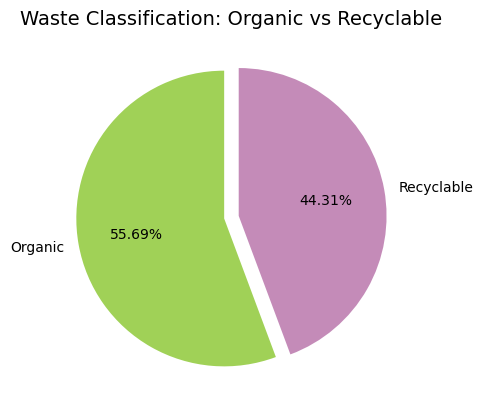

In [8]:
data = pd.DataFrame({
    'label': ['Organic'] * 12565 + ['Recyclable'] * 9999  # Example data
})

# Define colors and labels
colors = ['#a0d157', '#c48bb8']  # Custom colors for the slices
labels = ['Organic', 'Recyclable']  # Waste categories
explode = [0.05, 0.05]  # Slightly separate both slices

# Create the pie chart
plt.pie(data.label.value_counts(), labels=labels, autopct='%0.2f%%', 
        colors=colors, startangle=90, explode=explode)

# Add title and display the chart
plt.title('Waste Classification: Organic vs Recyclable', fontsize=14)
plt.show()